# Linear Regression

You will create a linar model to predict a target value for the California Housing Data.

In [92]:
from sklearn.datasets import fetch_california_housing
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn import linear_model
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16})

# Load the dataset
california_housing = fetch_california_housing()

# Convert to DataFrame for easier handling
california_df = pd.DataFrame(data=california_housing.data, columns=california_housing.feature_names)

# Add the target variable (median house value)
california_df['target'] = california_housing.target
target = california_df['target']

# Display the first few rows
print(california_df.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


Ridge()

Find a best fit linear model. Plot the data and the best fit line using some appropriate techniques.
Determine the amount of variance explained by the linear model

In [95]:
features = california_df.drop('target', axis=1) 


linreg = linear_model.LinearRegression()
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    features,target, test_size=0.1, random_state=42
)

linreg = linear_model.LinearRegression()
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    features,target, test_size=0.1, random_state=42
)

linreg.fit(X_train, y_train)

LinearRegression()

In [97]:
y_pred = linreg.predict(X_test)

In [99]:
metrics.mean_squared_error(y_test, y_pred)

0.5590019245025635

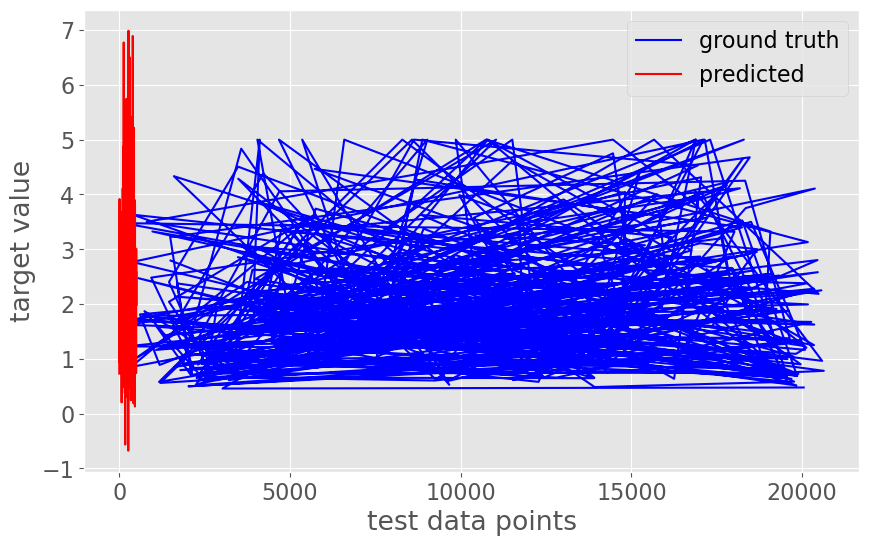

In [101]:
subset_size = 500
plt.figure(figsize=(10, 6))
plt.plot(y_test[:subset_size], label='ground truth', color='blue')
plt.plot(y_pred[:subset_size], label='predicted', color='red')
plt.xlabel('test data points')
plt.ylabel('target value')
plt.legend()
plt.show()

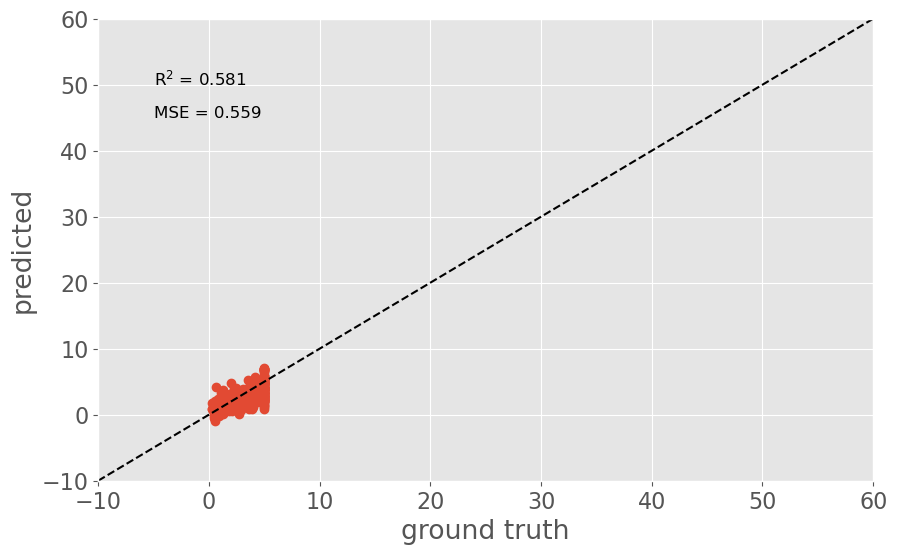

In [103]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, y_pred, 'o')
plt.plot([-10, 60], [-10, 60], 'k--')
plt.axis([-10, 60, -10, 60])
plt.xlabel('ground truth')
plt.ylabel('predicted')

scorestr = r'R$^2$ = %.3f' % linreg.score(X_test, y_test)
errstr = 'MSE = %.3f' % metrics.mean_squared_error(y_test, y_pred)
plt.text(-5, 50, scorestr, fontsize=12)
plt.text(-5, 45, errstr, fontsize=12);

Next, apply lasso and/or ridge regression to see if the results improve. Describe your results below with graphs and tables as appropriate.

In [106]:
ridgereg = linear_model.Ridge()

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    features, target, test_size=0.1, random_state=42
)

ridgereg.fit(X_train, y_train)



Ridge()

In [108]:
metrics.mean_squared_error(y_train, ridgereg.predict(X_train))

0.5205320691482117

In [110]:
y_pred = ridgereg.predict(X_test)
metrics.mean_squared_error(y_test, y_pred)

0.5589961818225982

Text(0, 0.5, 'target value')

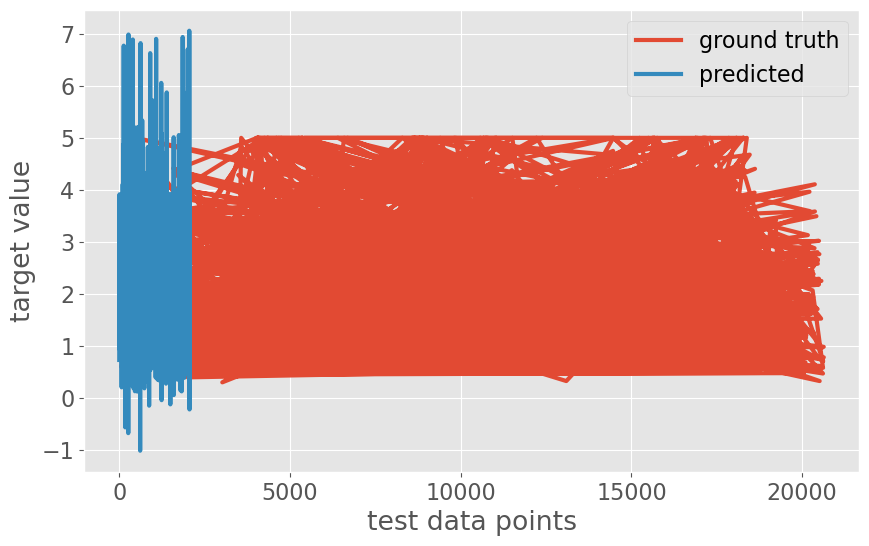

In [112]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, linewidth=3, label='ground truth')
plt.plot(y_pred, linewidth=3, label='predicted')
plt.legend(loc='best')
plt.xlabel('test data points')
plt.ylabel('target value')

Text(-5, 45, 'MSE = 0.559')

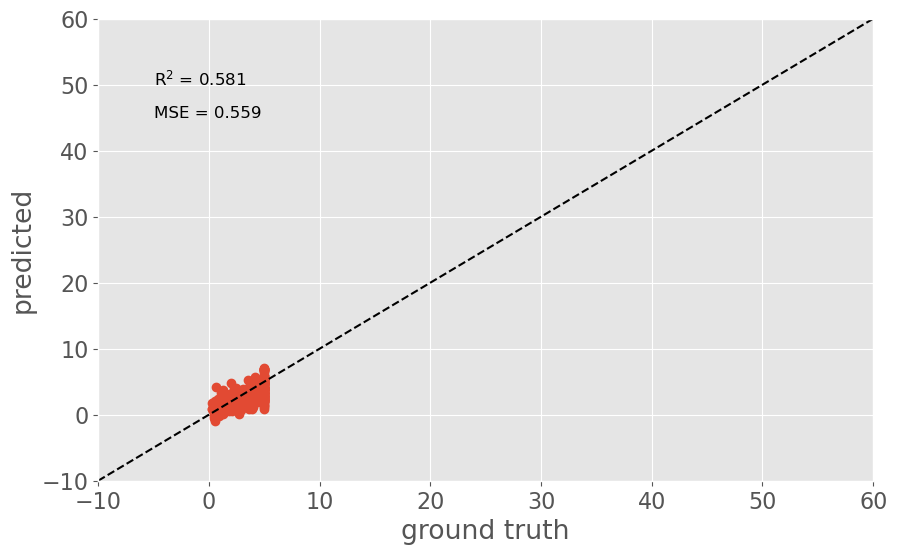

In [88]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, y_pred, 'o')
plt.plot([-10, 60], [-10, 60], 'k--')
plt.axis([-10, 60, -10, 60])
plt.xlabel('ground truth')
plt.ylabel('predicted')

scorestr = r'R$^2$ = %.3f' % ridgereg.score(X_test, y_test)
errstr = 'MSE = %.3f' % metrics.mean_squared_error(y_test, y_pred)
plt.text(-5, 50, scorestr, fontsize=12)
plt.text(-5, 45, errstr, fontsize=12)

In [90]:
print("Linear Regression coefficients:", linreg.coef_)
print("Ridge Regression coefficients:", ridgereg.coef_)

Linear Regression coefficients: [ 4.41643302e-01  9.57511565e-03 -1.10367141e-01  6.52574143e-01
 -4.32296453e-06 -3.61976686e-03 -4.18702648e-01 -4.31747018e-01]
Ridge Regression coefficients: [ 4.41532229e-01  9.57685530e-03 -1.10155678e-01  6.51462068e-01
 -4.31636503e-06 -3.61952902e-03 -4.18687618e-01 -4.31716232e-01]


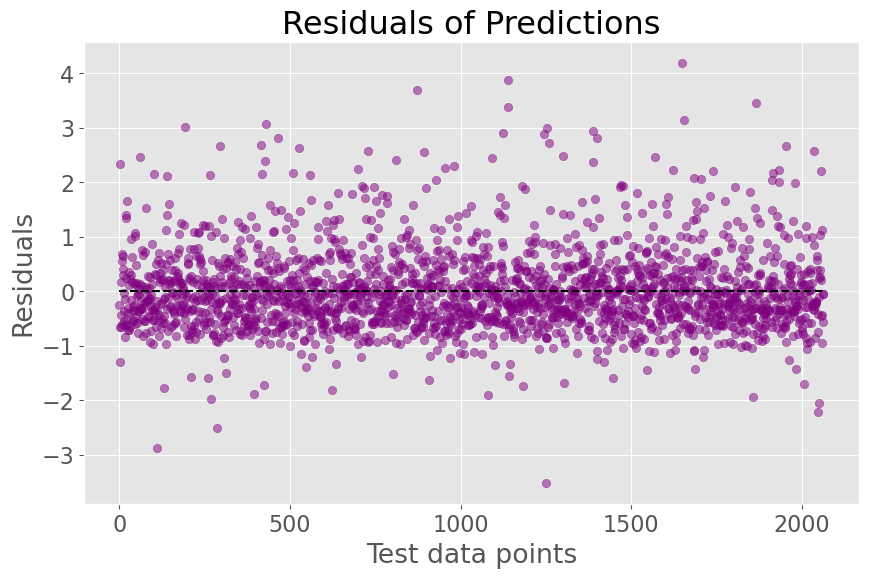